In [2]:
from google.colab import drive
drive.mount('content')

Mounted at content


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
df_stroke = pd.DataFrame(stroke)
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df_stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
average = df_stroke['bmi'].mean()
average

28.893236911794666

In [6]:
df_stroke.bmi=(df_stroke.bmi.fillna(28.74))

In [7]:
df_stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.887209,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698075,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.74,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [11]:
df_stroke["gender"].replace({'Male': 0, "Female": 1, "Other": -1}, inplace=True)
df_stroke["ever_married"].replace({'Yes': 1, "No": 0}, inplace=True)
df_stroke["work_type"].replace({'Private': 0, "Self-employed": 1, "Govt_job": 2, "children": 3, "Never_worked": 4}, inplace=True)
df_stroke["Residence_type"].replace({'Urban': 0, "Rural": 1}, inplace=True)
df_stroke["smoking_status"].replace({'formerly smoked': 0, "never smoked": 1, "smokes": 2, "Unknown": -1}, inplace=True)

print(df_stroke.head(20))

       id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0    9046       0  67.0             0              1             1          0   
1   51676       1  61.0             0              0             1          1   
2   31112       0  80.0             0              1             1          0   
3   60182       1  49.0             0              0             1          0   
4    1665       1  79.0             1              0             1          1   
5   56669       0  81.0             0              0             1          0   
6   53882       0  74.0             1              1             1          0   
7   10434       1  69.0             0              0             0          0   
8   27419       1  59.0             0              0             1          0   
9   60491       1  78.0             0              0             1          0   
10  12109       1  81.0             1              0             1          0   
11  12095       1  61.0     

In [12]:
from sklearn.model_selection import train_test_split

X = df_stroke.drop('stroke',axis=1)
y = df_stroke['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)

(3577, 11)
(1533, 11)


In [13]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

X_train_mmscaled = mm_scaler.transform(X_train)
X_test_mmscaled = mm_scaler.transform(X_test)

print("X_train per-feature minimum sebelum scaling:\n {}".format(X_train.min(axis=0)))
print("X_train per-feature minimum sebelum scaling:\n {}".format(X_train.max(axis=0)))
print("X_train per-feature minimum sebelum scaling:\n {}".format(X_train_mmscaled.min(axis=0)))
print("X_train per-feature minimum sebelum scaling:\n {}".format(X_train_mmscaled.max(axis=0)))

X_train per-feature minimum sebelum scaling:
 id                   77.00
gender                0.00
age                   0.08
hypertension          0.00
heart_disease         0.00
ever_married          0.00
work_type             0.00
Residence_type        0.00
avg_glucose_level    55.12
bmi                  10.30
smoking_status       -1.00
dtype: float64
X_train per-feature minimum sebelum scaling:
 id                   72940.00
gender                   1.00
age                     82.00
hypertension             1.00
heart_disease            1.00
ever_married             1.00
work_type                4.00
Residence_type           1.00
avg_glucose_level      271.74
bmi                     97.60
smoking_status           2.00
dtype: float64
X_train per-feature minimum sebelum scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
X_train per-feature minimum sebelum scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

SKBest = SelectKBest(k=5)
SKBest.fit(X_train_mmscaled, y_train)

X_train_skbest = SKBest.transform(X_train_mmscaled)

print("X_train: {}".format(X_train.shape))
print("X_train_skbest: {}".format(X_train_skbest.shape))
print("X_train_mmscaled: {}".format(X_train_mmscaled.shape))

X_train: (3577, 11)
X_train_skbest: (3577, 5)
X_train_mmscaled: (3577, 11)


Feature yang terpilih:         age  hypertension  heart_disease  ever_married  avg_glucose_level
0     67.0             0              1             1             228.69
1     61.0             0              0             1             202.21
2     80.0             0              1             1             105.92
3     49.0             0              0             1             171.23
4     79.0             1              0             1             174.12
...    ...           ...            ...           ...                ...
5105  80.0             1              0             1              83.75
5106  81.0             0              0             1             125.20
5107  35.0             0              0             1              82.99
5108  51.0             0              0             1             166.29
5109  44.0             0              0             1              85.28

[5110 rows x 5 columns]


([], [])

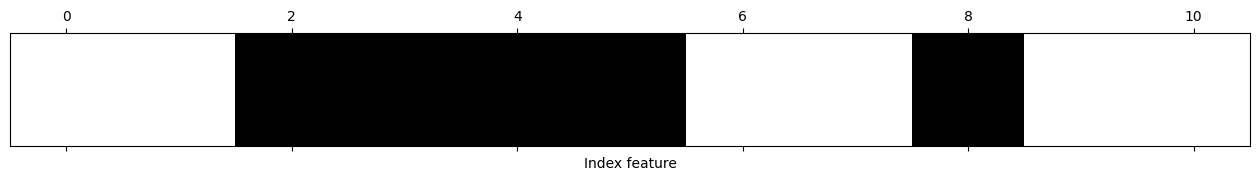

In [15]:
mask = SKBest.get_support()
print("Feature yang terpilih: ",df_stroke.drop(['stroke'],axis=1).loc[:,mask])

plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Index feature")
plt.yticks(())

In [16]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selectM = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=0),
    threshold='median')

selectM.fit(X_train_mmscaled, y_train)

X_train_smodel = selectM.transform(X_train_mmscaled)
print("X_train: {}".format(X_train_mmscaled.shape))
print("X_train_smodel: {}".format(X_train_smodel.shape))

X_train: (3577, 11)
X_train_smodel: (3577, 6)


In [20]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.1, max_iter=1000)
LR_Xtrain_regular = LR.fit(X_train, y_train)
LR = LogisticRegression(C=0.1, max_iter=1000)
LR_Xtrain_mmscaled = LR.fit(X_train_mmscaled, y_train)
LR = LogisticRegression(C=0.1, max_iter=1000)
LR_Xtrain_skbest = LR.fit(X_train_skbest, y_train)
LR = LogisticRegression(C=0.1, max_iter=1000)
LR_Xtrain_selectM = LR.fit(X_train_smodel, y_train)

print("Koefisien")
print("LR_Xtrain_regular: {}".format(LR_Xtrain_regular.coef_))
print("LR_Xtrain_mmscaled: {}".format(LR_Xtrain_mmscaled.coef_))
print("LR_Xtrain_skbest: {}".format(LR_Xtrain_skbest.coef_))
print("LR_Xtrain_selectm: {}".format(LR_Xtrain_selectM.coef_))

print("\nIntercept")
print("LR_Xtrain_regular: {}".format(LR_Xtrain_regular.intercept_))
print("LR_Xtrain_mmscaled: {}".format(LR_Xtrain_mmscaled.intercept_))
print("LR_Xtrain_skbest: {}".format(LR_Xtrain_skbest.intercept_))
print("LR_Xtrain_selectm: {}".format(LR_Xtrain_selectM.intercept_))

print("\nAkurasi")
print("LR_Xtrain_regular: {}".format(LR_Xtrain_regular.score(X_train, y_train)))
print("LR_Xtrain_mmscaled: {}".format(LR_Xtrain_mmscaled.score(X_train_mmscaled, y_train)))
print("LR_Xtrain_skbest: {}".format(LR_Xtrain_skbest.score(X_train_skbest, y_train)))
print("LR_Xtrain_selectm: {}".format(LR_Xtrain_selectM.score(X_train_smodel, y_train)))

Koefisien
LR_Xtrain_regular: [[-5.70032746e-06 -1.63832157e-01  3.96006687e-02  1.52756421e-01
   1.09046395e-01 -1.15676596e-01 -6.16819939e-01 -2.08909680e-01
   7.44303698e-04 -1.39968326e-01  2.46571309e-02]]
LR_Xtrain_mmscaled: [[ 2.01628188e-01  1.64976878e-01  2.00058693e+00  5.15932555e-01
   5.52779340e-01  1.56698396e-01 -3.38040215e-01 -1.74785762e-01
   4.96336287e-01 -1.41634113e-03 -1.26447185e-01]]
LR_Xtrain_skbest: [[2.02300542 0.50864467 0.53516029 0.16431612 0.4840215 ]]
LR_Xtrain_selectm: [[ 0.20859508  2.2298471  -0.35692464  0.6016958   0.02936267 -0.07531167]]

Intercept
LR_Xtrain_regular: [-0.30435378]
LR_Xtrain_mmscaled: [-4.62528541]
LR_Xtrain_skbest: [-4.63827106]
LR_Xtrain_selectm: [-4.54677191]

Akurasi
LR_Xtrain_regular: 0.9530332681017613
LR_Xtrain_mmscaled: 0.9535923958624546
LR_Xtrain_skbest: 0.9535923958624546
LR_Xtrain_selectm: 0.9535923958624546


In [21]:
SKBest = SelectKBest(k=5)
SKBest.fit(X_test_mmscaled, y_test)

X_test_skbest = SKBest.transform(X_test_mmscaled)

selectM = SelectFromModel(RandomForestClassifier(
    n_estimators=100, random_state=0), threshold='median')

selectM.fit(X_test_mmscaled, y_test)
X_test_selectM = selectM.transform(X_test_mmscaled)

print("LR_Xtrain_regular: {}".format(LR_Xtrain_regular.score(X_test, y_test)))
print("LR_Xtrain_mmscaled: {}".format(LR_Xtrain_mmscaled.score(X_test_mmscaled, y_test)))
print("LR_Xtrain_skbest: {}".format(LR_Xtrain_skbest.score(X_test_skbest, y_test)))
print("LR_Xtrain_slfm: {} ".format(LR_Xtrain_selectM.score(X_test_selectM, y_test)))

LR_Xtrain_regular: 0.9445531637312459
LR_Xtrain_mmscaled: 0.9458577951728636
LR_Xtrain_skbest: 0.9458577951728636
LR_Xtrain_slfm: 0.9458577951728636 


1. Pengaruh penskalaan data terhadap performa model?

Jawab : Data yang belum di scaling menggunakan MinMaxScaler memiliki value yang tidak proporsional dengan skala yang berbeda. Berbeda dengan data yang sudah discaling yang memiliki value yang proporsional dengan skala yang sama. Hal ini tentu berpengaruh pada performa model linear dalam mempelajari data yang mana performanya akan lebih baik pada pada yang sudah discaling terlebih dahulu.

2. Apa feature yang penting untuk membedakan antara pasien yang rawan terkena stroke dengan yang sehat?

Jawab : Terdapat dua feature yag penting, yaitu umur (age) dan rata-rata tingkat glukosa (avg_glucose_level).